<a href="https://colab.research.google.com/github/MrDadnooo/ICS/blob/main/Copy_of_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naƒçten√≠ soubor≈Ø
V tomto skriptu se naƒçtou log soubory ulo≈æen√© v ZIP souboru. Tento soubor si st√°hnƒõte a nahrajte do stejn√©ho adres√°≈ôe, jakou jsou tyto jupyter notebooky. Jedn√° se o evoluƒçn√≠ n√°vrh 4bitov√Ωch sƒç√≠taƒçek pro r≈Øzn√© parametry lambda, poƒçet sloupc≈Ø a ƒçetnost mutace.

In [ ]:
! [ -e adders.zip ] || wget https://ehw.fit.vutbr.cz/bin/adders.zip
! [ -e example.log ] || wget https://ehw.fit.vutbr.cz/bin/example.log


--2023-03-16 13:36:20--  ftp://https/
           => ‚Äò.listing‚Äô
Resolving https (https)... failed: Name or service not known.
wget: unable to resolve host address ‚Äòhttps‚Äô
//: Scheme missing.
--2023-03-16 13:36:20--  http://ehw.fit.vutbr.cz/bin/adders.zip
Resolving ehw.fit.vutbr.cz (ehw.fit.vutbr.cz)... 147.229.177.159, 2001:67c:1220:8b0::93e5:b19f
Connecting to ehw.fit.vutbr.cz (ehw.fit.vutbr.cz)|147.229.177.159|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ehw.fit.vutbr.cz/bin/adders.zip [following]
--2023-03-16 13:36:21--  https://ehw.fit.vutbr.cz/bin/adders.zip
Connecting to ehw.fit.vutbr.cz (ehw.fit.vutbr.cz)|147.229.177.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8396621 (8.0M) [application/zip]
Saving to: ‚Äòadders.zip‚Äô

adders.zip          100%[===================>]   8.01M  46.7MB/s    in 0.2s    

2023-03-16 13:36:21 (46.7 MB/s) - ‚Äòadders.zip‚Äô saved [8396621/8396621]

FINISHED --

In [ ]:
# Naƒçten√≠ pot≈ôebn√Ωch knihoven
import zipfile
import pandas as pd
import re


V prvn√≠ funkci se pomoc√≠ regul√°rn√≠ho v√Ωrazu naparsuj√≠ vstupn√≠ parametry evoluce. Vytvo≈ô√≠ se objekt typu `dictionary`. 

In [ ]:
def parse_filename(filename):
    # adders/FA-adder_full_u4bit-L1-C0050-M01-R0000.log
    g = re.match(r".*u(\d)bit-L(\d+)-C(\d+)-M(\d+)-R(\d+)\.log", filename)
    bw, lback, columns, mutations, run = g.groups()
    return {
        "bw": int(bw),
        "lambda_p": int(lback),
        "cols": int(columns),
        "muts": int(mutations),
        "run": int(run)
    }


parse_filename("adders/FA-adder_full_u4bit-L1-C0050-M01-R0000.log")


{'bw': 4, 'lambda_p': 1, 'cols': 50, 'muts': 1, 'run': 0}

Dal≈°√≠ funkce projde v≈°echny ≈ô√°dky souboru a posledn√≠ ≈ô√°dek urƒçuj√≠c√≠ v√Ωslednou kvalitu se urƒç√≠ poƒçet generac√≠, doba trv√°n√≠ (v sekund√°ch), zda se poda≈ôilo naj√≠t funkƒçn√≠ ≈ôe≈°en√≠ a celkov√Ω poƒçet uzl≈Ø.

In [ ]:
def parse_log(file):
    last_line = None
    # pruchod pres vsechny radky a hledani vystupu fitness
    # generation:         1 time: 0.000 idx:0 fitness: 1296/2560 active nodes: 26
    for l in file.readlines():
        if l.startswith("generation:"):
            last_line = l

    assert last_line

    g = re.match(
        r"generation:\s*(\d+) time:\s*(\d+\.\d+) idx:\d+ fitness: (\d+)/(\d+) active nodes: (\d+)", last_line)

    gen, time, fit, fitmax, active = g.groups()
    gen, fit, fitmax, active = int(gen), int(fit), int(fitmax), int(active)

    return {
        "gen": int(gen),
        "duration": float(time),
        "success": int(fit) >= int(fitmax),
        "nodes": int(active)
    }


print(parse_log(open("example.log", "r")))


{'gen': 1647531, 'duration': 48.027, 'success': True, 'nodes': 37}


Nyn√≠ se projodou v≈°echny soubory a vytvo≈ô√≠ se jeden slovn√≠k. Konstrukce `{**a, **b}` slou≈æ√≠ ke spojen√≠ dvou slovn√≠k≈Ø.

In [ ]:
from io import TextIOWrapper
alld = []
with zipfile.ZipFile("adders.zip") as zf:
    for filename in zf.namelist():
        if not filename.endswith(".log"):
            continue
        d = {"filename": filename}
        d = {**d, **parse_filename(filename)}
        # IO wrapper -> prevod z bytu na str
        d = {**d, **parse_log(TextIOWrapper(zf.open(filename, "r")))}

        alld.append(d)
alld


[{'filename': 'adders/FA-adder_full_u4bit-L1-C0050-M01-R0000.log',
  'bw': 4,
  'lambda_p': 1,
  'cols': 50,
  'muts': 1,
  'run': 0,
  'gen': 1647531,
  'duration': 48.027,
  'success': True,
  'nodes': 37},
 {'filename': 'adders/FA-adder_full_u4bit-L1-C0050-M01-R0001.log',
  'bw': 4,
  'lambda_p': 1,
  'cols': 50,
  'muts': 1,
  'run': 1,
  'gen': 9054341,
  'duration': 482.732,
  'success': True,
  'nodes': 36},
 {'filename': 'adders/FA-adder_full_u4bit-L1-C0050-M01-R0002.log',
  'bw': 4,
  'lambda_p': 1,
  'cols': 50,
  'muts': 1,
  'run': 2,
  'gen': 2323602,
  'duration': 127.441,
  'success': True,
  'nodes': 36},
 {'filename': 'adders/FA-adder_full_u4bit-L1-C0050-M01-R0003.log',
  'bw': 4,
  'lambda_p': 1,
  'cols': 50,
  'muts': 1,
  'run': 3,
  'gen': 1106003,
  'duration': 60.292,
  'success': True,
  'nodes': 33},
 {'filename': 'adders/FA-adder_full_u4bit-L1-C0050-M01-R0004.log',
  'bw': 4,
  'lambda_p': 1,
  'cols': 50,
  'muts': 1,
  'run': 4,
  'gen': 3538888,
  'duratio

Nyn√≠ se vytvo≈ô√≠ z pole slovn√≠k≈Ø jeden dataframe (tabulka), se kterou budeme d√°le pracovat. 

In [ ]:
df = pd.DataFrame(alld)
df


filename  bw  lambda_p  cols  \
0     adders/FA-adder_full_u4bit-L1-C0050-M01-R0000.log   4         1    50   
1     adders/FA-adder_full_u4bit-L1-C0050-M01-R0001.log   4         1    50   
2     adders/FA-adder_full_u4bit-L1-C0050-M01-R0002.log   4         1    50   
3     adders/FA-adder_full_u4bit-L1-C0050-M01-R0003.log   4         1    50   
4     adders/FA-adder_full_u4bit-L1-C0050-M01-R0004.log   4         1    50   
...                                                 ...  ..       ...   ...   
2155  adders/FA-adder_full_u4bit-L4-C0500-M20-R0085.log   4         4   500   
2156  adders/FA-adder_full_u4bit-L4-C0500-M20-R0086.log   4         4   500   
2157  adders/FA-adder_full_u4bit-L4-C0500-M20-R0087.log   4         4   500   
2158  adders/FA-adder_full_u4bit-L4-C0500-M20-R0088.log   4         4   500   
2159  adders/FA-adder_full_u4bit-L4-C0500-M20-R0089.log   4         4   500   

      muts  run      gen  duration  success  nodes  
0        1    0  1647531    48.027     True     37  
1        1    1  9054341   482.732     True     36  
2        1    2  2323602   127.441     True     36  
3        1    3  1106003    60.292     True     33  
4        1    4  3538888   181.252     True     36  
...    ...  ...      ...       ...      ...    ...  
2155    20   85   433493   113.220     True     84  
2156    20   86   361864    63.896     True     60  
2157    20   87   416746    71.737     True     89  
2158    20   88   271578    71.305     True     64  
2159    20   89   634971   113.391     True     62  

[2160 rows x 10 columns]

S tabulkou m≈Ø≈æeme d√°le pracovat - nap≈ô. si urƒçit √∫spƒõ≈°nost n√°vrhu.

In [ ]:
df["success"].mean()


1.0

A data si ulo≈æ√≠me do Pickle souboru pro dal≈°√≠ zpracov√°n√≠.

In [ ]:
df.to_pickle("data.pkl.gz")


# Zpracov√°n√≠ dat
Tento notebook p≈ôedstavuje hlavn√≠ ƒç√°st, se kterou budete ve sv√©m ≈ôe≈°en√≠ projektu pracovat. Naƒçtou se data, kter√° jste vygenerovali v ƒç√°sti 1 a budete je d√°le analyzovat. Norm√°lnƒõ by toto byl samostatn√Ω soubor, nicm√©nƒõ pro pr√°ci s Google Colab je lep≈°√≠ pracovat s jedn√≠m notebookem

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


Pomoc√≠ funkce `pd.read_pickle` naƒçtƒõte soubor _data.pkl.gz_. Tento soubor ulo≈æte do promƒõnn√© `df` a zobrazte ji jako tabulku (tj. posledn√≠ ≈ô√°dek bu≈àky bude `df`).

In [ ]:
# TODO
df = pd.read_pickle('data.pkl.gz')
df


filename  bw  lambda_p  cols  \
0     adders/FA-adder_full_u4bit-L1-C0050-M01-R0000.log   4         1    50   
1     adders/FA-adder_full_u4bit-L1-C0050-M01-R0001.log   4         1    50   
2     adders/FA-adder_full_u4bit-L1-C0050-M01-R0002.log   4         1    50   
3     adders/FA-adder_full_u4bit-L1-C0050-M01-R0003.log   4         1    50   
4     adders/FA-adder_full_u4bit-L1-C0050-M01-R0004.log   4         1    50   
...                                                 ...  ..       ...   ...   
2155  adders/FA-adder_full_u4bit-L4-C0500-M20-R0085.log   4         4   500   
2156  adders/FA-adder_full_u4bit-L4-C0500-M20-R0086.log   4         4   500   
2157  adders/FA-adder_full_u4bit-L4-C0500-M20-R0087.log   4         4   500   
2158  adders/FA-adder_full_u4bit-L4-C0500-M20-R0088.log   4         4   500   
2159  adders/FA-adder_full_u4bit-L4-C0500-M20-R0089.log   4         4   500   

      muts  run      gen  duration  success  nodes  
0        1    0  1647531    48.027     True     37  
1        1    1  9054341   482.732     True     36  
2        1    2  2323602   127.441     True     36  
3        1    3  1106003    60.292     True     33  
4        1    4  3538888   181.252     True     36  
...    ...  ...      ...       ...      ...    ...  
2155    20   85   433493   113.220     True     84  
2156    20   86   361864    63.896     True     60  
2157    20   87   416746    71.737     True     89  
2158    20   88   271578    71.305     True     64  
2159    20   89   634971   113.391     True     62  

[2160 rows x 10 columns]

Pomoc√≠ funkce `unique()` v√°zan√© k s√©rii (sloupci) vypi≈°te unik√°tn√≠ hodnoty slouc≈Ø _cols, muts, lambda_p_.

In [ ]:
# TODO
u_cols = pd.unique(df["cols"])
u_muts = pd.unique(df["muts"])
u_lambda_p = pd.unique(df["lambda_p"])
u_cols, u_muts, u_lambda_p


(array([ 50, 100, 500]), array([ 1,  5, 10, 20]), array([1, 4]))

## Jednoduch√° anal√Ωza v√Ωsledk≈Ø
Pomoc√≠ filtrace `df.query` vytvo≈ôte nov√Ω dataframe `df2`, kter√Ω bude obsahovat pouze v√Ωsledky s 5 mutacemi a parametrem _lambda_p_ roven 1 a s √∫spƒõ≈°n√Ωmi hled√°n√≠mi (_success_ je pozitivn√≠). Tento dataframe rovnou zobrazte.

In [ ]:
# TODO
df2 = df.query("muts == 5 and lambda_p == 1 and success == True")
df2
# df.query("sloupec1 == 4 and sloupec2 < 3 and sloupec3 == @x") 

filename  bw  lambda_p  cols  \
90   adders/FA-adder_full_u4bit-L1-C0050-M05-R0000.log   4         1    50   
91   adders/FA-adder_full_u4bit-L1-C0050-M05-R0001.log   4         1    50   
92   adders/FA-adder_full_u4bit-L1-C0050-M05-R0002.log   4         1    50   
93   adders/FA-adder_full_u4bit-L1-C0050-M05-R0003.log   4         1    50   
94   adders/FA-adder_full_u4bit-L1-C0050-M05-R0004.log   4         1    50   
..                                                 ...  ..       ...   ...   
895  adders/FA-adder_full_u4bit-L1-C0500-M05-R0085.log   4         1   500   
896  adders/FA-adder_full_u4bit-L1-C0500-M05-R0086.log   4         1   500   
897  adders/FA-adder_full_u4bit-L1-C0500-M05-R0087.log   4         1   500   
898  adders/FA-adder_full_u4bit-L1-C0500-M05-R0088.log   4         1   500   
899  adders/FA-adder_full_u4bit-L1-C0500-M05-R0089.log   4         1   500   

     muts  run       gen  duration  success  nodes  
90      5    0  16049771   410.215     True     37  
91      5    1  16110669   384.738     True     40  
92      5    2   4668996   212.050     True     40  
93      5    3   2541158   113.824     True     37  
94      5    4   6812178   303.183     True     33  
..    ...  ...       ...       ...      ...    ...  
895     5   85   3860603   339.157     True     52  
896     5   86   1774823    98.425     True     61  
897     5   87    765902    67.331     True     58  
898     5   88   1819540   100.595     True     64  
899     5   89   2945076   259.595     True     48  

[270 rows x 10 columns]

## Tvorba boxplotu
Vytvo≈ôte jednoduch√Ω boxplot pro dobu trv√°n√≠ (sloupec _duration_) pro jednotliv√© nastaven√≠ poƒçtu sloupc≈Ø (_cols_). Pro data pro ka≈æd√Ω ze t≈ô√≠ boxplot≈Ø m≈Ø≈æete pou≈æt√≠ filtraci z `df2` p≈ô√≠kazem `query`, ze kter√©ho pak vyberete pouze duration - t.j. `df2.query("...")["duration]`. Nezapome≈àte nastavit popisky os a ticky na ose X.

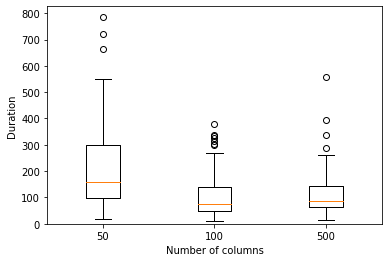

In [ ]:
# TODO
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot([df2.query(f"cols == {cols}")["duration"] for cols in u_cols])
ax.set_xticklabels(u_cols)
ax.set(xlabel="Number of columns",
ylabel="Duration", ylim=(0, None))
pass


Do tohoto pole napi≈°te z√°vƒõr z boxplotu. Co m≈Ø≈æeme vidƒõt? (cca 2 vƒõty)

## Tvorba histogramu
Nyn√≠ si zanalyzujeme v√Ωsledky trv√°n√≠ pro __50 sloupc≈Ø__ detailnƒõ. Vykreslete proto histogram pro toto nastaven√≠. Pou≈æijte filtraci jako v√Ω≈°e. 

Graf nezapome≈àte spr√°vnƒõ nakonfigurovat (titulek, popisy os, limit a podobnƒõ)

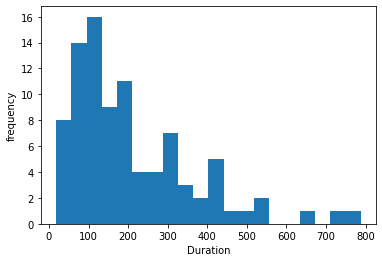

In [ ]:
# TODO
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df2.query("cols == 50")["duration"], bins=20)
ax.set(xlabel="Duration", ylabel="frequency")
pass

## Statistick√° anal√Ωza
Jak√° je pr≈Ømƒõrn√° doba trv√°n√≠ pro 100 a 500 sloupc≈Ø? Vytvo≈ôte si dvƒõ s√©rie v√Ωbƒõrem jako v√Ω≈°e a vypi≈°te jejich: pr≈Ømƒõr, medi√°n, minimum, maximum a 1. a 3. kvartil.

In [ ]:
# TODO
cols_100 = df2.query("cols == 100")["duration"]
cols_500 = df2.query("cols == 500")["duration"]

cols_100.mean(), cols_100.median(), cols_100.min(), cols_100.max(), np.percentile(cols_100, 25), np.percentile(cols_100, 75),cols_500.mean(), cols_500.median(), cols_500.min(), cols_500.max(), np.percentile(cols_500, 25), np.percentile(cols_500, 75)




(108.07947777777778,
 75.82050000000001,
 12.35,
 378.526,
 48.508,
 140.08974999999998,
 112.06851111111108,
 86.562,
 14.618,
 557.963,
 62.18725,
 142.28525)

Podle medi√°n≈Ø se uk√°zalo, ≈æe jedno ≈ôe≈°en√≠ je lep≈°√≠. Je to opravdu statisticky v√Ωznamn√©? Proveƒète [Mann-Whitney U-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) (`mannwhitneyu`), proto≈æe data nejsou norm√°ln√≠. Urƒçete, zda je tento rozd√≠l signifikantn√≠ (s vƒõrnost√≠ 0.95).

> The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions.

In [ ]:
# TODO
statistic, p_value = st.mannwhitneyu(cols_100, cols_500)


print(f"P hodnota je vacsia ako alfa: {p_value > 1 - 0.95}. Teda hypotezu, ze riesenia nie su statisticky odlisne, nezamietame.")


P hodnota je vacsia ako alfa: True. Teda hypotezu, ze riesenia nie su statisticky odlisne, nezamietame.


Napi≈°te z√°vƒõr anal√Ωzy

## Pro rychl√© a zv√≠dav√©
Tento notebook p≈ôedstavuje rychlokurz datov√© anal√Ωzy a nep≈ôedstavuje v≈ædy nejlep≈°√≠ ≈ôe≈°en√≠. Zkuste si pak implementovat boxploty pomoc√≠ Seabornu (`sns.boxplot`), kdy vypln√≠te parametry `data` (dataframe), `x` (n√°zev sloupce na x-ov√© ose) a `y` (n√°zev sloupce na ose y). Nav√≠c m≈Ø≈æete pou≈æ√≠t i vƒõt≈°√≠ dataset a nastavit parametr `hue` pro podbarven√≠ (nap≈ô. poƒçet mutac√≠). N√°vratov√° hodnota je matplotib _axis_ (`ax`), kter√Ω m≈Ø≈æete pou≈æ√≠t k dal≈°√≠ konfiguraci

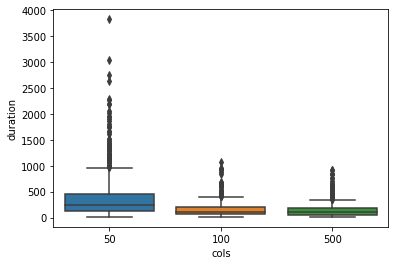

In [ ]:
import seaborn as sns
ax = sns.boxplot(data=df.query("success == True"), x="cols", y="duration") # todo (jen ve voln√©m ƒçase)
ax


# Konvergenƒçn√≠ k≈ôivky
Pro vybranou konfiguraci (s 90 bƒõhy) n√°s bude zaj√≠mat, jak vlastnƒõ vypad√° v√Ωvoj fitness v ƒçase. Zase by se jednalo o samostatn√Ω soubor, ale kv≈Øli Google Colab st√°le pracujeme v jednom notebooku.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import re



## Z√≠sk√°v√°n√≠ dat
Nyn√≠ chceme p≈ôev√©st ka≈æd√Ω log do 2D numpy pole, kdy prvn√≠ prvn√≠ sloupec obsahuje generaci a druh√Ω sloupec odpov√≠daj√≠c√≠ fitness. Va≈°√≠m √∫kolem bude doplnit regul√°rn√≠ v√Ωraz pro naƒç√≠t√°n√≠ generace a fitness a po dvojic√≠ch jej vlo≈æit do pole `alld`. Pro testovac√≠ log soubor by mƒõl vzniknout n√°sleduj√≠c√≠ v√Ωstup:

```[[      1    1296]
 [     12    1352]
 [     26    1392]
...
 [1589571    2536]
 [1647531    2560]]```
 

In [ ]:
# TODO
def parse_gens(file): ###
    # pruchod pres vsechny radky a hledani vystupu fitness ###
    # generation:         1 time: 0.000 idx:0 fitness: 1296/2560 active nodes: 26 ###
    alld = [] ###
    for l in file.readlines(): ###
        pass ###
        # napiste vhodny regularni vyrat podle sablony nahore ziskavajici  dvojici generace a fitness ###
        # z tohoto udelame 2d numpy pole (staci pridat do pole alld) ###
        g = re.match(
        r"generation:\s*(\d+) time:\s*(\d+\.\d+) idx:\d+ fitness: (\d+)/(\d+) active nodes: (\d+)", l)
        if g:
          gen, _, fit, _, _ = g.groups()
          alld.append([ int(gen), int(fit)]) ###

###
    return np.array(alld)  ###
print(parse_gens(open("example.log", "r"))) ###


[[      1    1296]
 [     12    1352]
 [     26    1392]
 [     55    1404]
 [    318    1436]
 [    334    1492]
 [    566    1524]
 [    583    1536]
 [    882    1664]
 [   1096    1696]
 [   1692    1712]
 [   2166    1728]
 [   3738    1744]
 [   3741    1760]
 [   3804    1792]
 [   8518    1808]
 [   8531    1840]
 [   8550    1888]
 [   8938    1920]
 [   9537    1936]
 [   9538    1952]
 [  11996    1984]
 [  19818    1992]
 [  19825    2000]
 [  20545    2008]
 [  20578    2016]
 [  20630    2024]
 [  20670    2040]
 [  21323    2048]
 [  21416    2080]
 [  21649    2112]
 [  28001    2120]
 [  28284    2128]
 [  28791    2144]
 [  31935    2176]
 [  88212    2192]
 [  89609    2208]
 [ 125401    2224]
 [ 125607    2240]
 [ 186461    2272]
 [ 186725    2288]
 [ 188051    2304]
 [ 193849    2336]
 [ 194146    2368]
 [ 202584    2376]
 [ 259842    2380]
 [ 267481    2392]
 [ 498071    2400]
 [ 536514    2408]
 [ 536559    2416]
 [ 537754    2432]
 [ 606305    2440]
 [ 608640   

Nyn√≠ vytvo≈ô√≠me list numpy 2D pol√≠ (pro ka≈æd√Ω log soubor) odpov√≠daj√≠c√≠ nastaven√≠ _bw=4, lambda=1, cols=50 a muts=5_ (vybr√°no n√°hodnƒõ). Nemohli jsme udƒõlat jedno 3D pole, jeliko≈æ ka≈æd√© hled√°n√≠ vy≈æaduje jin√Ω poƒçet krok≈Ø - t≈ôet√≠ dimenze pak nen√≠ konstantn√≠.

In [ ]:
from io import TextIOWrapper
allgens = []

alld = []
with zipfile.ZipFile("adders.zip") as zf:
    for filename in zf.namelist():
        if not filename.endswith(".log") or "FA-adder_full_u4bit-L1-C0050-M05-R" not in filename:
            continue
        # IO wrapper -> prevod z bytu na str
        gens = parse_gens(TextIOWrapper(zf.open(filename, "r")))

        allgens.append(gens)
allgens


[array([[       2,     1296],
        [       3,     1344],
        [      26,     1352],
        [      29,     1400],
        [      37,     1408],
        [      60,     1418],
        [     110,     1420],
        [     122,     1422],
        [     133,     1440],
        [     270,     1448],
        [     322,     1472],
        [     582,     1536],
        [    1406,     1552],
        [    1414,     1560],
        [    1582,     1568],
        [    1721,     1584],
        [    1784,     1600],
        [    1863,     1632],
        [    1919,     1696],
        [    1959,     1760],
        [    2256,     1792],
        [    2294,     1856],
        [    3685,     1888],
        [    3840,     1920],
        [    4076,     1936],
        [    4119,     1984],
        [    5362,     2048],
        [   30800,     2080],
        [   32885,     2112],
        [   34993,     2176],
        [  124566,     2188],
        [  124585,     2196],
        [  124818,     2200],
        [ 

## V≈°echny k≈ôivky p≈ôes sebe
Vykreslete graf v≈°ech bƒõh≈Ø. Pro ka≈æd√Ω bƒõh `for g in allgens` vykreslete jednu ƒç√°ru - ide√°lnƒõ pou≈æijte funkci `ax.step(x = ..., y = ...  ,where="post", alpha = 0.2)`. Alfa kan√°l umo≈æn√≠ zobrazen√≠ v√≠ce ƒçar p≈ôes sebe. 

Grafu nastavte logaritmick√© mƒõ≈ô√≠tko na ose X.

<ipython-input-71-ded47fa4392b>:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(bottom=0)


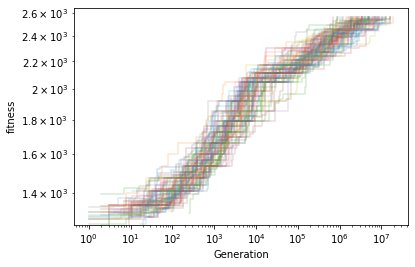

In [ ]:
# TODO
fig, ax = plt.subplots() ###
##
for g in allgens: ###
    pass ###
    ax.step(x=g[:,0],y=g[:,1],where="post",alpha=0.2)
    ax.set(xscale='log', yscale='log', xlabel='Generation', ylabel='fitness')
    ax.set_ylim(bottom=0)
    # vykreslete pomoci ax.step ###
# nastavte parametry (log. meritko, ylim od 0 do None, popisky os, ...)


Tato konvergenƒçn√≠ k≈ôivka sice trochu pom≈Ø≈æe, ale nen√≠ to spr√°vn√° vizualizace tohoto dƒõje. 

## Vykreslen√≠ konvergenƒçn√≠ k≈ôivky
Mohli bychom si spoƒç√≠tat minimum, maximum a pr≈Ømƒõr a vykreslit pomoc√≠ `plt.fill_between`, ale pro n√°s je v√Ωhodnƒõj≈°√≠ vyu≈æ√≠t knihovnu _seaborn_. Tato knihovna umo≈æ≈àuje jednodu≈°e generovat grafy z Pandas dataframu. V√Ωhodou je to, ≈æe je pak m≈Ø≈æeme upravit s vyu≈æit√≠m na≈°ich znalost√≠ z matplotlib. Pro v√≠ce uk√°zek doporuƒçuji zkontrolovat [galerii](https://seaborn.pydata.org/examples/index.html).

V prvn√≠ ƒç√°sti p≈ôevedeme v≈°echna data na jeden dataframe, kde p≈ôid√°me sloupec "runid".

In [ ]:
alldf = []

for rid, g in enumerate(allgens):
    d = pd.DataFrame(g, columns=["gen", "fit"])
    d["runid"] = rid
    alldf.append(d)
df = pd.concat(alldf, ignore_index=True)
df


gen   fit  runid
0           2  1296      0
1           3  1344      0
2          26  1352      0
3          29  1400      0
4          37  1408      0
...       ...   ...    ...
5058  6846197  2480     89
5059  6859680  2496     89
5060  6890691  2512     89
5061  6999771  2536     89
5062  7024371  2560     89

[5063 rows x 3 columns]

Vykreslete nyn√≠ ƒç√°rov√Ω graf pomoc√≠ funkce `sns.lineplot`. Argumenty budou `data=df, x="gen", y="fit"`.

N√°vratov√° hodnota t√©to funkce je objekt _Axis_ `ax`. Nastavte mu stejn√© parametry, jako v√Ω≈°e (logaritmick√© mƒõ≈ô√≠tko a podobnƒõ).

[None, None]

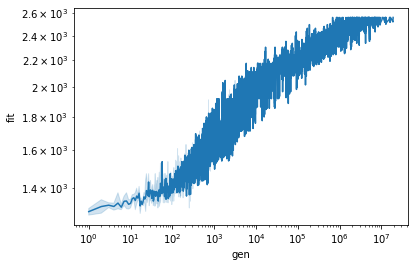

In [ ]:
# TODO
ax = sns.lineplot(data=df, x="gen", y="fit")
ax.set(yscale='log', xscale='log')
ax.set_ylim(bottom=0)

Tento graf ale nen√≠ spr√°vnƒõ. Spr√°vnƒõ se mƒõl spoƒç√≠tat tzv. confidence interval a mƒõlo b√Ωt vidƒõt, jak se fitness mƒõn√≠ v ƒçase. Probl√©mem je to, ≈æe nem√°me pro ka≈ædou generaci definovan√Ω v√Ωsledek pro v≈°echny bƒõhy. Nezb√Ωv√° urƒçit vzorkovac√≠ body, pro kter√© si spoƒç√≠t√°me (interpolujeme) hodnotu fitness.

Vytvo≈ôte tedy numpy pole `gens_selected` obsahuj√≠c√≠ logaritmicky vzorkovan√© body. Pro generov√°n√≠ tohoto rozsahu m≈Ø≈æete vyu≈æ√≠t funkci `np.geomspace(start, stop, steps)` s t√≠m, ≈æe zvol√≠te na z√°kladƒõ p≈ôedchoz√≠ho grafu poƒç√°tek, konec a vhodn√Ω poƒçet bod≈Ø.

In [ ]:
# TODO
gens_selected = np.geomspace(df['gen'].min(), df['gen'].max(), 100) ###

Nyn√≠ budeme interpolovat a extrapolovat. Vyu≈æijeme k tomu funkci `scipy.interpolate.interp1d`. Tato funkce vytv√°≈ô√≠ objekt na z√°kladƒõ dvojic _x_ a _y_. Potom tento objekt m≈Ø≈æeme zavolat (jako funkci) s libovoln√Ωm vstupem (i vektorem) a vr√°t√≠ n√°m body, kter√© by fitness mƒõla pro danou generaci. Norm√°lnƒõ se dƒõl√° line√°rn√≠ prolo≈æen√≠, nicm√©nƒõ zde budeme prokl√°dat p≈ôedchoz√≠ hodnotou (fitness se mƒõn√≠ skokovƒõ).

In [ ]:
from scipy.interpolate import interp1d
alldf = []

for rid, g in enumerate(allgens):
    # vytvorime interpolacni funkci. Pridame i bod 0, protoze ten v seznamu neni
    g = np.concatenate([[[0, g[0, 1]]], g])
    fn = interp1d(x=g[:, 0], y=g[:, 1], kind="previous",
                  fill_value="extrapolate")

    d = pd.DataFrame()
    # generace nastavime nasim vzorkovacim
    d["gen"] = gens_selected
    # a fitness odpovida prolozene hodnote
    d["fit"] = fn(gens_selected)
    d["runid"] = rid
    alldf.append(d)
df_interp = pd.concat(alldf, ignore_index=True)
df_interp


gen     fit  runid
0     1.000000e+00  1296.0      0
1     1.184529e+00  1296.0      0
2     1.403109e+00  1296.0      0
3     1.662024e+00  1296.0      0
4     1.968716e+00  1296.0      0
...            ...     ...    ...
8995  9.701676e+06  2560.0     89
8996  1.149192e+07  2560.0     89
8997  1.361251e+07  2560.0     89
8998  1.612442e+07  2560.0     89
8999  1.909984e+07  2560.0     89

[9000 rows x 3 columns]

Nyn√≠ vykreslete graf stejnƒõ jako v√Ω≈°e pomoc√≠ finkce `sns.lineplot`. Pou≈æijte funkci √∫plnƒõ stejnƒõ jako v√Ω≈°e, jen m√≠sto `df` pou≈æijte na≈°e nov√° vzrokovan√° data `df_interp`. 

Vykreslil se u≈æ graf spr√°vnƒõ? V≈°imnƒõte si, kde doch√°zelo k variac√≠m a kde u≈æ je velk√° jistota, ≈æe fitness bude vysok√°. Je zadan√Ω algoritmus stabiln√≠ z pohledu konvergence?

[None]

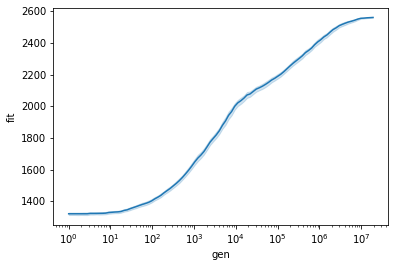

In [ ]:
# TODO
ax = sns.lineplot(data=df_interp, x='gen', y='fit')
ax.set(xscale='log')

Barevn√Ω pruh n√°m urƒçuje confidence interval (0.95) poƒç√≠tan√Ω z distribuce. St≈ôed je pr≈Ømƒõrn√° hodnota. My si v≈°ak m≈Ø≈æeme zobrazit nap≈ô medi√°n a minimum a maximum. V√≠ce v [dokumentaci](https://seaborn.pydata.org/tutorial/error_bars.html)

Zkuste p≈ôidat parametr `estimator=np.median`. V novƒõj≈°√≠ch verz√≠ch knihovny Seaborn (nen√≠ p≈ô√≠pad Google Colab ü•π) se zad√°va `estimator="median", errorbar=("pi", 100)` (100. percentil - min / max, m≈Ø≈æete pou≈æ√≠t t≈ôeba 75.).

[None]

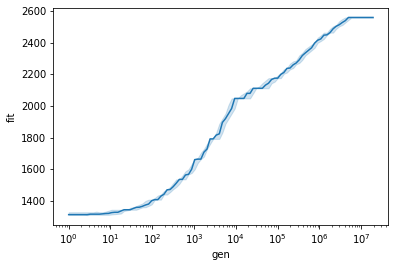

In [ ]:
# TODO
ax = sns.lineplot(data=df_interp, x='gen', y='fit', estimator=np.median)
ax.set(xscale='log')